# New York City TLC Trip Record
**Created by:** Christian\
**Class Code** JCDS2904\
NYC TLC Trip Record,available for download at <a href="https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N">this Google Drive link</a>.

# 📘 Project Overview:NYC Taxi Trip Analysis
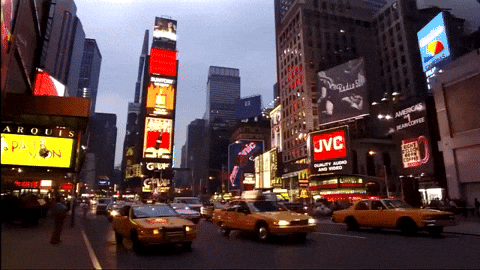

**👥 Stakeholders**
- **Taxi service operators** — responsible for managing fleets and maximizing revenue.
- **City transportation managers** — interested in traffic,congestion,and service efficiency.
- **Pricing and strategy teams** — focused on optimizing fare structures and customer satisfaction.

**❓ Problem Statement**
> The company lacks insights into when and where taxi operations are most profitable. There is also limited understanding of what factors most influence total earnings and tips. This hampers the ability to make informed operational,pricing,and staffing decisions.

**🎯 Goal**
> To uncover patterns in time,location,and trip characteristics that significantly impact total earnings and tips. This analysis aims to deliver actionable recommendations that can improve operational efficiency,optimize resource allocation,and enhance revenue.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

pd.set_option("display.max_rows",500)
warnings.filterwarnings("ignore")

# Data
1. Read Dataset
2. Data Profiling
3. Data Cleansing
4. Data Transformation

## 1. Read Dataset

---
**🚕 Feature Descriptions**

1. `VendorID`
A code indicating the LPEP (Licensed Technology Service Provider) that provided the record:
- `1`:Creative Mobile Technologies,LLC.
- `2`:VeriFone Inc.

2. `lpep_pickup_datetime`
The date and time when the meter was engaged.

3. `lpep_dropoff_datetime`
The date and time when the meter was disengaged.

4. `store_and_fwd_flag`
Indicates whether the trip record was held in vehicle memory before sending to the vendor (store and forward):
- `Y`:Store and forward trip (no connection at the time).
- `N`:Not a store and forward trip.

5. `RateCodeID`
Final rate code in effect at the end of the trip:
- `1`:Standard rate
- `2`:JFK
- `3`:Newark
- `4`:Nassau or Westchester
- `5`:Negotiated fare
- `6`:Group ride([Reddit][1],[Socrata Developers][2],[Cran][3])

6. `PULocationID`
TLC Taxi Zone where the meter was engaged (pickup location).([Welcome to NYC.gov | City of New York][4])

7. `DOLocationID`
TLC Taxi Zone where the meter was disengaged (drop-off location).

8. `Passenger_count`
Number of passengers in the vehicle (driver-entered).

9. `trip_distance`
Elapsed trip distance in miles reported by the taximeter.

10. `fare_amount`
Time-and-distance fare calculated by the meter.

11. `extra`
Additional charges:
- \$0.50 for trips between 8 PM and 6 AM (night surcharge).
- \$1.00 for trips on weekdays between 4 PM and 8 PM (peak hour surcharge).

12. `mta_tax`
\$0.50 MTA tax automatically triggered based on the metered rate in use.

13. `tip_amount`
Tip amount paid by passengers; this field is automatically populated for credit card tips. Cash tips are not included.

14. `tolls_amount`
Total amount of all tolls paid during the trip.

15. `ehail_fee`
This field was included for potential e-hail fees (e.g.,fees associated with app-based hailing services). However,it is typically null or not populated in the dataset.

16. `improvement_surcharge`
\$0.30 improvement surcharge assessed on hailed trips at the flag drop. This surcharge began being levied in 2015.

17. `total_amount`
Total amount charged to passengers. This includes fare amount,extra charges,MTA tax,tip amount,tolls amount,improvement surcharge,and congestion surcharge. It does not include cash tips.

18. `trip_type`
A code indicating whether the trip was a street hail or a dispatch:

- `1`:Street-hail
- `2`:Dispatch

19. `congestion_surcharge`
A surcharge imposed on trips that begin,end,or pass through Manhattan south of 96th Street (the congestion zone):
- \$2.50 for non-shared trips in taxicabs
- \$2.75 for non-shared trips in for-hire vehicles (including green taxis)
- \$0.75 for shared rides([NYC311][5],[Welcome to NYC.gov | City of New York][6],[Limo Anywhere][7])
---

In [2]:
df=pd.read_csv("input/NYC TLC Trip Record.csv")

display(
    df.sample(5)
)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
24127         2  2023-01-13 00:53:26   2023-01-13 01:01:31                  N   
20992         1  2023-01-11 17:13:24   2023-01-11 17:30:46                  N   
29501         2  2023-01-15 16:34:10   2023-01-15 16:42:18                  N   
56118         2  2023-01-28 00:34:56   2023-01-28 00:38:43                  N   
43364         2  2023-01-22 14:07:48   2023-01-22 14:16:02                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
24127         1.0             7           223              1.0           1.47   
20992         1.0           243           235              1.0           0.00   
29501         1.0           134           216              1.0           2.12   
56118         1.0            75            41              1.0           0.96   
43364         1.0            65            49              1.0           1.42   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
24127         10.0    1.0      0.5        0.00           0.0        NaN   
20992         18.5    0.0      1.5        0.00           0.0        NaN   
29501         11.4    0.0      0.5        3.87           0.0        NaN   
56118          6.5    1.0      0.5        1.80           0.0        NaN   
43364         10.0    0.0      0.5        3.45           0.0        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
24127                    1.0         12.50           2.0        1.0   
20992                    1.0         20.00           1.0        1.0   
29501                    1.0         16.77           1.0        1.0   
56118                    1.0         10.80           1.0        1.0   
43364                    1.0         14.95           1.0        1.0   

       congestion_surcharge  
24127                   0.0  
20992                   0.0  
29501                   0.0  
56118                   0.0  
43364                   0.0

---
**🚕 Feature Descriptions**

1. `LocationID` A unique numeric code representing a specific pickup or dropoff area.

2. `Borough` The larger administrative division where the location is situated (e.g., Manhattan, Queens).

3. `Zone` A more detailed neighborhood or district name within the borough.

4. `service_zone` Categorizes the location by operational area, such as Yellow Zone, Green Zone, or Airport.

---

In [3]:
zone=pd.read_csv("input/NYC TLC Zone.csv")

# Gabung dengan data pickup zone
df=pd.merge(df,zone[["LocationID","Borough"]],how="left",left_on="PULocationID",right_on="LocationID")
df=df.rename(columns={"Borough":"pickup_location"})
df=df.drop(["LocationID","PULocationID"],axis=1)

# Gabung dengan data dropoff zone
df=pd.merge(df,zone[["LocationID","Borough"]],how="left",left_on="DOLocationID",right_on="LocationID")
df=df.rename(columns={"Borough":"dropoff_location"})
df=df.drop(["LocationID","DOLocationID"],axis=1)

## 2. Data profiling
**Result:**
1. Change `lpep_pickup_datetime` and `lpep_dropoff_datetime` type ⟶ `Datetime64`
2. Missing Data at `RateCodeID`,`passenger_count`,`payment_type`,`trip_type`,and `congestion_surcharge`
3. Remove `ehail_fee` entirely data missing
4. Mapping:`VendorID`,`store_and_fwd_flag`,`RateCodeID`,and `trip_type`
5. Filter:
   - `fare_amount` min=\$ -70.00
   - `extra` min=\$ -2,50
   - `mta_tax` min=\$ -0.50
   - `tip_amount` min=\$ -10.50
   - `improvement_surcharge` min=\$ -1.00
   - `total_amount` min=\$ -71.50
   - `congestion_surcharge` min=\$ -2.75
6. Outlier:`trip_distance` > 1500
7. Correlation:
   - `fare_ammount` and `total_amount`=0.97
   - `tip_amount` and `total_amount`=0.51
   - `tolls_amount` and `total_amount`=0.41
   - `fare_amount` and `tip_ammount`=0.31

In [4]:
df.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0         1.0              1.0           2.58         14.9    1.0      0.5   
1         1.0              1.0           1.81         10.7    1.0      0.5   
2         1.0              1.0           0.00          7.2    1.0      0.5   
3         1.0              1.0           1.30          6.5    0.5      1.5   
4         1.0              1.0           1.10          6.0    0.5      1.5   

   tip_amount  tolls_amount  ehail_fee  improvement_surcharge  total_amount  \
0        4.03           0.0        NaN                    1.0         24.18   
1        2.64           0.0        NaN                    1.0         15.84   
2        1.94           0.0        NaN                    1.0         11.64   
3        1.70           0.0        NaN                    1.0         10.20   
4        0.00           0.0        NaN                    1.0          8.00   

   payment_type  trip_type  congestion_surcharge pickup_location  \
0           1.0        1.0                  2.75       Manhattan   
1           1.0        1.0                  0.00       Manhattan   
2           1.0        1.0                  0.00          Queens   
3           1.0        1.0                  0.00       Manhattan   
4           1.0        1.0                  0.00       Manhattan   

  dropoff_location  
0        Manhattan  
1        Manhattan  
2           Queens  
3        Manhattan  
4        Manhattan

In [5]:
dtype=pd.DataFrame(df.dtypes).rename(
    columns={
        0:"Data Type"
    }
)

value=pd.DataFrame(df.head(1)).T.rename(
    columns={
        0:"Value"
    }
)

dtype.join(value)

Data Type                Value
VendorID                  int64                    2
lpep_pickup_datetime     object  2023-01-01 00:26:10
lpep_dropoff_datetime    object  2023-01-01 00:37:11
store_and_fwd_flag       object                    N
RatecodeID              float64                  1.0
passenger_count         float64                  1.0
trip_distance           float64                 2.58
fare_amount             float64                 14.9
extra                   float64                  1.0
mta_tax                 float64                  0.5
tip_amount              float64                 4.03
tolls_amount            float64                  0.0
ehail_fee               float64                  NaN
improvement_surcharge   float64                  1.0
total_amount            float64                24.18
payment_type            float64                  1.0
trip_type               float64                  1.0
congestion_surcharge    float64                 2.75
pickup_location          object            Manhattan
dropoff_location         object            Manhattan

In [6]:
df.describe()

VendorID    RatecodeID  passenger_count  trip_distance  \
count  68211.000000  63887.000000     63887.000000   68211.000000   
mean       1.863028      1.117160         1.315870       8.114852   
std        0.343820      1.372913         0.979054     585.105955   
min        1.000000      1.000000         0.000000       0.000000   
25%        2.000000      1.000000         1.000000       1.110000   
50%        2.000000      1.000000         1.000000       1.850000   
75%        2.000000      1.000000         1.000000       3.210000   
max        2.000000     99.000000         9.000000  120098.840000   

        fare_amount         extra       mta_tax    tip_amount  tolls_amount  \
count  68211.000000  68211.000000  68211.000000  68211.000000  68211.000000   
mean      16.603545      0.825431      0.588340      2.139012      0.169627   
std       13.470121      1.269904      0.385819      3.052710      1.099789   
min      -70.000000     -2.500000     -0.500000    -10.500000      0.000000   
25%        9.300000      0.000000      0.500000      0.000000      0.000000   
50%       13.500000      0.000000      0.500000      1.600000      0.000000   
75%       19.800000      1.000000      0.500000      3.330000      0.000000   
max      490.000000     12.500000      2.750000    222.220000     36.050000   

       ehail_fee  improvement_surcharge  total_amount  payment_type  \
count        0.0           68211.000000  68211.000000  63887.000000   
mean         NaN               0.951625     21.789377      1.373613   
std          NaN               0.196875     15.457115      0.508039   
min          NaN              -1.000000    -71.500000      1.000000   
25%          NaN               1.000000     12.900000      1.000000   
50%          NaN               1.000000     17.900000      1.000000   
75%          NaN               1.000000     26.150000      2.000000   
max          NaN               1.000000    491.000000      5.000000   

          trip_type  congestion_surcharge  
count  63877.000000          63887.000000  
mean       1.021933              0.726748  
std        0.146465              1.212836  
min        1.000000             -2.750000  
25%        1.000000              0.000000  
50%        1.000000              0.000000  
75%        1.000000              2.750000  
max        2.000000              2.750000

In [7]:
pd.DataFrame(df.nunique()).rename(columns={0:"Unique Value"})

Unique Value
VendorID                          2
lpep_pickup_datetime          66575
lpep_dropoff_datetime         66519
store_and_fwd_flag                2
RatecodeID                        6
passenger_count                  10
trip_distance                  1870
fare_amount                    2553
extra                            16
mta_tax                           6
tip_amount                     1492
tolls_amount                     26
ehail_fee                         0
improvement_surcharge             5
total_amount                   4670
payment_type                      5
trip_type                         2
congestion_surcharge              4
pickup_location                   7
dropoff_location                  7

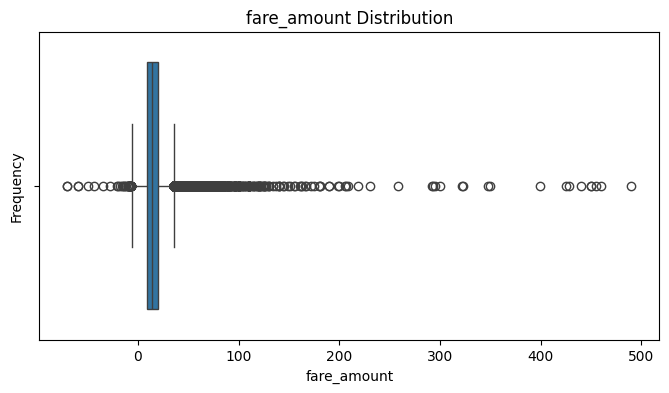

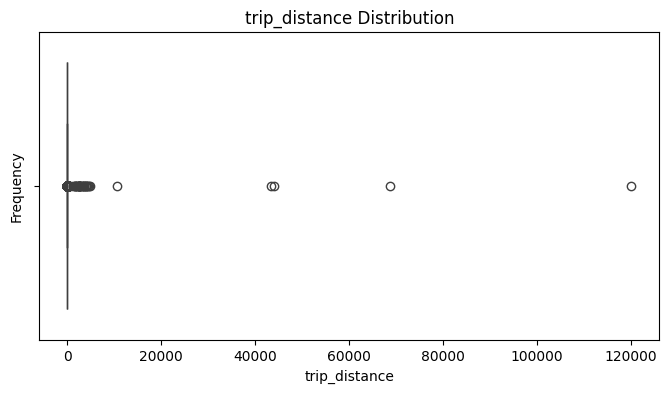

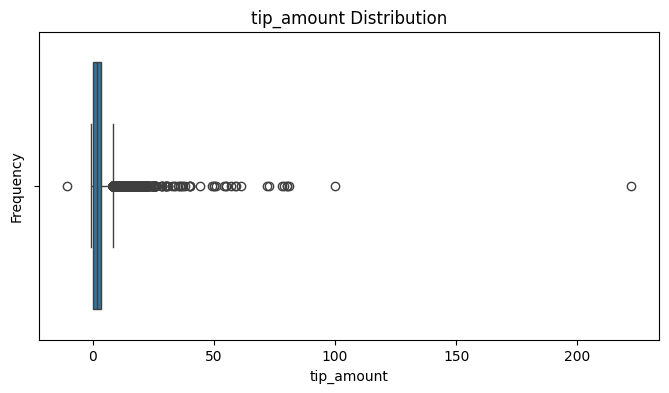

In [8]:
cols=[
    "fare_amount",
    "trip_distance",
    "tip_amount"
]

for col in cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [9]:
check_corr=df.drop(columns=[
    "lpep_pickup_datetime",
    "lpep_dropoff_datetime",
    "store_and_fwd_flag",
    "pickup_location",
    "dropoff_location"
])

check_corr.corr()

VendorID  RatecodeID  passenger_count  trip_distance  \
VendorID               1.000000   -0.008287         0.084265       0.004002   
RatecodeID            -0.008287    1.000000        -0.004009       0.026716   
passenger_count        0.084265   -0.004009         1.000000       0.007186   
trip_distance          0.004002    0.026716         0.007186       1.000000   
fare_amount            0.006724    0.097378         0.013237       0.012833   
extra                 -0.136073   -0.048503        -0.006019      -0.005774   
mta_tax               -0.908011   -0.090009        -0.079977      -0.014687   
tip_amount             0.061815    0.006248         0.026053       0.003216   
tolls_amount          -0.017384    0.022052         0.003623       0.000808   
ehail_fee                   NaN         NaN              NaN            NaN   
improvement_surcharge -0.071401   -0.036233         0.027175      -0.001646   
total_amount           0.019674    0.078795         0.019824       0.011702   
payment_type           0.007002   -0.019782        -0.014177      -0.013694   
trip_type              0.042880    0.936312        -0.001703      -0.001135   
congestion_surcharge   0.009523   -0.038727         0.023339       0.084841   

                       fare_amount     extra   mta_tax  tip_amount  \
VendorID                  0.006724 -0.136073 -0.908011    0.061815   
RatecodeID                0.097378 -0.048503 -0.090009    0.006248   
passenger_count           0.013237 -0.006019 -0.079977    0.026053   
trip_distance             0.012833 -0.005774 -0.014687    0.003216   
fare_amount               1.000000 -0.003625 -0.074420    0.313688   
extra                    -0.003625  1.000000  0.200986    0.101623   
mta_tax                  -0.074420  0.200986  1.000000   -0.091542   
tip_amount                0.313688  0.101623 -0.091542    1.000000   
tolls_amount              0.335509  0.062253 -0.020641    0.196708   
ehail_fee                      NaN       NaN       NaN         NaN   
improvement_surcharge     0.069489  0.078139  0.154879    0.026255   
total_amount              0.967764  0.100460 -0.075833    0.511460   
payment_type             -0.052622 -0.085146 -0.028368   -0.500553   
trip_type                 0.157503 -0.087019 -0.253546    0.019974   
congestion_surcharge      0.149941  0.091409  0.012407    0.265940   

                       tolls_amount  ehail_fee  improvement_surcharge  \
VendorID                  -0.017384        NaN              -0.071401   
RatecodeID                 0.022052        NaN              -0.036233   
passenger_count            0.003623        NaN               0.027175   
trip_distance              0.000808        NaN              -0.001646   
fare_amount                0.335509        NaN               0.069489   
extra                      0.062253        NaN               0.078139   
mta_tax                   -0.020641        NaN               0.154879   
tip_amount                 0.196708        NaN               0.026255   
tolls_amount               1.000000        NaN               0.014620   
ehail_fee                       NaN        NaN                    NaN   
improvement_surcharge      0.014620        NaN               1.000000   
total_amount               0.405128        NaN               0.087002   
payment_type              -0.039489        NaN              -0.073195   
trip_type                  0.010011        NaN              -0.092653   
congestion_surcharge      -0.036060        NaN               0.005660   

                       total_amount  payment_type  trip_type  \
VendorID                   0.019674      0.007002   0.042880   
RatecodeID                 0.078795     -0.019782   0.936312   
passenger_count            0.019824     -0.014177  -0.001703   
trip_distance              0.011702     -0.013694  -0.001135   
fare_amount                0.967764     -0.052622   0.157503   
extra                      0.100460     -0.085146  -0.087019   
mta_tax             

## 3. Data Cleansing
1. Handle Missing Values
2. Remove Duplicates
3. Remove Invalid Values
4. Remove Outliers

### Handle Missing Values

In [10]:
check_missing=pd.DataFrame(round(
    df.isna().sum()/len(df)*100,2
).astype(str)+"%").rename(
    columns={
        0:"Missing Value"
    }
)

check_missing[check_missing["Missing Value"]!="0.0%"]

Missing Value
store_and_fwd_flag           6.34%
RatecodeID                   6.34%
passenger_count              6.34%
ehail_fee                   100.0%
payment_type                 6.34%
trip_type                    6.35%
congestion_surcharge         6.34%

<div class="alert alert-danger">Dropping the rows,since they represent only 6.35% of the total data.</div>

In [11]:
print("Before drop missing value:",len(df))
df=df.drop(columns=["ehail_fee"]).dropna()
print("After drop missing value:",len(df))

Before drop missing value: 68211
After drop missing value: 63877


### Remove Duplicates

In [12]:
pd.DataFrame(df.duplicated().value_counts())

count
False  63877

<div class="alert alert-success">Never mind,there are no duplicates</div>

### Remove Invalid Values

In [13]:
check_invalid=df[[
    "fare_amount",
    "extra",
    "mta_tax",
    "tip_amount",
    "improvement_surcharge",
    "total_amount",
    "congestion_surcharge",
    "trip_distance"
]].copy()

check_invalid=pd.DataFrame(round(
    (check_invalid < 0).sum()/len(check_invalid)*100,2
).astype(str)+"%").rename(
    columns={
        0:"Invalid Value"
    }
)

check_invalid.iloc[7]=round((df["trip_distance"]<0.61).sum()/len(df)*100,2).astype(str)+"%"

check_invalid[check_invalid["Invalid Value"]!="0.0%"]

Invalid Value
fare_amount                   0.27%
extra                         0.13%
mta_tax                       0.26%
tip_amount                    0.01%
improvement_surcharge         0.27%
total_amount                  0.27%
trip_distance                10.39%

<div class="alert alert-danger">Dropping the rows,since they represent only 0.27% of the total data,and dropping 10.39% of the rows where trip_distance is below 1 KM.</div>

In [14]:
print("Before drop invalid value:",len(df))
df=df[df["fare_amount"]>=0]
df=df[df["extra"]>=0]
df=df[df["mta_tax"]>=0]
df=df[df["tip_amount"]>=0]
df=df[df["improvement_surcharge"]>=0]
df=df[df["total_amount"]>=0]
df=df[df["congestion_surcharge"]>=0]
df=df[df["trip_distance"]>=0.62]
print("After drop invalid value:",len(df))

Before drop invalid value: 63877
After drop invalid value: 57102


### Remove Outliers
- `fare_amount` > 200
- `trip_distance` > 200
- `tip_amount` > 50

In [15]:
outlier=[
    ["fare_amount",200],
    ["trip_distance",200],
    ["tip_amount",50]
]

check_outlier=[]

for col in outlier:
    percentage=round((df[col[0]]>col[1]).sum()/len(df)*100,3).astype(str)+"%"
    check_outlier.append([col[0],percentage])

pd.DataFrame(check_outlier,columns=["","Outlier Value"]).set_index("")

Outlier Value
                           
fare_amount          0.019%
trip_distance        0.002%
tip_amount           0.023%

<div class="alert alert-danger">Dropping the row,with outlier value.</div>

Before drop outlier value: 57102
After drop invalid value: 57075


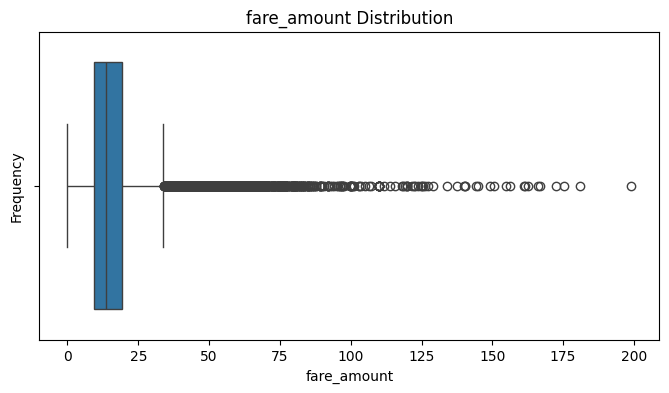

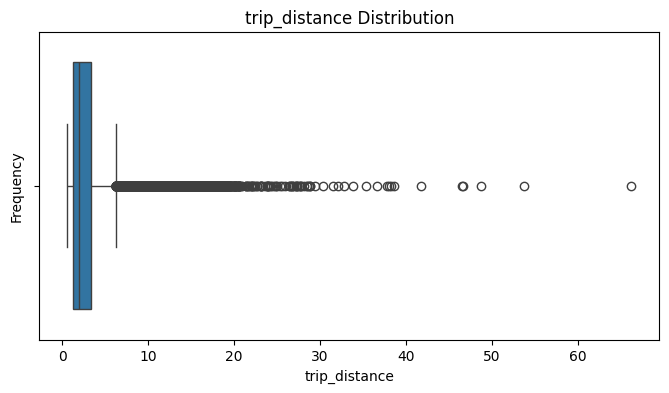

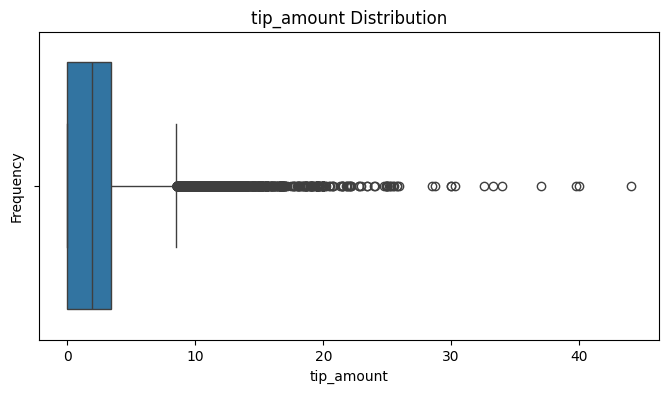

In [16]:
print("Before drop outlier value:",len(df))

for col in outlier:
    df=df[df[col[0]]<col[1]]

print("After drop invalid value:",len(df))
for col in cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## 4. Data Transformation
- Covert Data Types
- Create Columns
- Value Mapping

### Convert Data Types

In [17]:
df["lpep_pickup_datetime"]=pd.to_datetime(df["lpep_pickup_datetime"],infer_datetime_format=True)
df["lpep_dropoff_datetime"]=pd.to_datetime(df["lpep_dropoff_datetime"],infer_datetime_format=True)
pd.DataFrame(df.dtypes).rename(columns={0:"Data Type"})

Data Type
VendorID                        int64
lpep_pickup_datetime   datetime64[ns]
lpep_dropoff_datetime  datetime64[ns]
store_and_fwd_flag             object
RatecodeID                    float64
passenger_count               float64
trip_distance                 float64
fare_amount                   float64
extra                         float64
mta_tax                       float64
tip_amount                    float64
tolls_amount                  float64
improvement_surcharge         float64
total_amount                  float64
payment_type                  float64
trip_type                     float64
congestion_surcharge          float64
pickup_location                object
dropoff_location               object

In [18]:
df[[
    "lpep_pickup_datetime",
    "lpep_dropoff_datetime"
]].describe()

lpep_pickup_datetime          lpep_dropoff_datetime
count                          57075                          57075
mean   2023-01-16 20:39:55.914253056  2023-01-16 20:58:23.057993728
min              2009-01-01 20:21:27            2009-01-02 11:07:31
25%              2023-01-09 12:32:29     2023-01-09 12:45:06.500000
50%              2023-01-17 09:08:08            2023-01-17 09:24:27
75%       2023-01-24 16:28:10.500000     2023-01-24 16:45:18.500000
max              2023-02-01 03:10:05            2023-02-01 17:27:05

### Value Mapping

1. `VendorID`
- `1` ⟶ Creative Mobile Technologies,LLC.
- `2` ⟶ VeriFone Inc.

2. `TripType`
- `Y`⟶ Store and forward trip
- `N`⟶ Not a store and forward trip

3. `RateCodeID`
- `1`⟶ Standard rate
- `2`⟶ JFK
- `3`⟶ Newark
- `4`⟶ Nassau or Westchester
- `5`⟶ Negotiated fare
- `6`⟶ Group ride

4. `TripType`
- `1`⟶ Street-hail
- `2`⟶ Dispatch

In [19]:
# VendorID
vendor_map={
    1:"Creative Mobile Technologies,LLC",
    2:"VeriFone Inc"
}
df["VendorID"]=df["VendorID"].map(vendor_map)

# store_and_fwd_flag
store_and_fwd_map={
   "Y":"Store and Forward Trip",
   "N":"Not a Store and Forward Trip"
}
df["store_and_fwd_flag"]=df["store_and_fwd_flag"].map(store_and_fwd_map)

# RateCodeID
rate_code_map={
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

df["RatecodeID"]=df["RatecodeID"].map(rate_code_map)


# payment_type
payment_type_map={
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}

df["payment_type"]=df["payment_type"].map(payment_type_map)

# trip_type
trip_type_map={
    1:"Street-hail",
    2:"Dispatch"
}
df["trip_type"]=df["trip_type"].map(trip_type_map)

### Create Columns

In [20]:
# Rename Columns
df.rename(columns={
   "VendorID":"vendor_id",
   "lpep_pickup_datetime":"pickup_datetime",
   "lpep_dropoff_datetime":"dropoff_datetime",
   "store_and_fwd_flag":"store_forward_flag",
   "RatecodeID":"rate_code_id",
   "PULocationID":"pickup_location_id",
   "DOLocationID":"dropoff_location_id",
   "extra":"extra_charge"
},inplace=True)

In [21]:
df["day"]=df["pickup_datetime"].dt.day_name()
df["hour"]=df["pickup_datetime"].dt.hour+1

In [22]:
# Number Of Trips per hour/day
numberOfTrips=df.groupby(["day","hour"])["vendor_id"].count().reset_index()

day_order=[
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
]

numberOfTrips["day"]=pd.Categorical(numberOfTrips["day"],categories=day_order,ordered=True)

pivotNumberOfTrips=numberOfTrips.pivot(index="day",columns="hour",values="vendor_id")
display(
    numberOfTrips,
    pivotNumberOfTrips
)

day  hour  vendor_id
0       Friday     1        133
1       Friday     2         76
2       Friday     3         37
3       Friday     4         34
4       Friday     5         23
5       Friday     6         36
6       Friday     7        126
7       Friday     8        374
8       Friday     9        418
9       Friday    10        419
10      Friday    11        429
11      Friday    12        411
12      Friday    13        394
13      Friday    14        417
14      Friday    15        560
15      Friday    16        665
16      Friday    17        662
17      Friday    18        681
18      Friday    19        675
19      Friday    20        540
20      Friday    21        411
21      Friday    22        301
22      Friday    23        267
23      Friday    24        232
24      Monday     1        107
25      Monday     2         62
26      Monday     3         42
27      Monday     4         60
28      Monday     5         45
29      Monday     6         44
30      Monday     7        121
31      Monday     8        357
32      Monday     9        381
33      Monday    10        439
34      Monday    11        445
35      Monday    12        480
36      Monday    13        504
37      Monday    14        528
38      Monday    15        546
39      Monday    16        661
40      Monday    17        677
41      Monday    18        662
42      Monday    19        696
43      Monday    20        536
44      Monday    21        369
45      Monday    22        290
46      Monday    23        202
47      Monday    24        138
48    Saturday     1        192
49    Saturday     2        167
50    Saturday     3        118
51    Saturday     4         96
52    Saturday     5         76
53    Saturday     6         41
54    Saturday     7         44
55    Saturday     8        102
56    Saturday     9        178
57    Saturday    10        233
58    Saturday    11        326
59    Saturday    12        406
60    Saturday    13        436
61    Saturday    14        483
62    Saturday    15        430
63    Saturday    16        562
64    Saturday    17        544
65    Saturday    18        485
66    Saturday    19        507
67    Saturday    20        458
68    Saturday    21        388
69    Saturday    22        305
70    Saturday    23        290
71    Saturday    24        266
72      Sunday     1        236
73      Sunday     2        234
74      Sunday     3        184
75      Sunday     4        159
76      Sunday     5        125
77      Sunday     6         64
78      Sunday     7         44
79      Sunday     8         89
80      Sunday     9        114
81      Sunday    10        207
82      Sunday    11        310
83      Sunday    12        396
84      Sunday    13        446
85      Sunday    14        447
86      Sunday    15        479
87      Sunday    16        541
88      Sunday    17        520
89      Sunday    18        478
90      Sunday    19        486
91      Sunday    20        420
92      Sunday    21        360
93      Sunday    22        280
94      Sunday    23        182
95      Sunday    24        146
96    Thursday     1         85
97    Thursday     2         59
98    Thursday     3         40
99    Thursday     4         27
100   Thursday     5         28
101   Thursday     6         50
102   Thursday     7        144
103   Thursday     8        393
104   Thursday     9        441
105   Thursday    10        485
106   Thursday    11        469
107   Thursday    12        444
108   Thursday    13        432
109   Thursday    14        473
110   Thursday    15        540
111   Thursday    16        632
112   Thursday    17        672
113   Thursday    18        722
114   Thursday    19        752
115   Thursday    20        529
116   Thursday    21        433
117   Thursday    22        297
118   Thursday    23        235
119   Thursday    24        161
120    Tuesday     1         79
121    Tuesday     2         46
122    Tuesday     3         42
123    Tuesday     4         34
124    Tues

hour        1    2    3    4    5   6    7    8    9    10  ...   15   16  \
day                                                         ...             
Monday     107   62   42   60   45  44  121  357  381  439  ...  546  661   
Tuesday     79   46   42   34   18  42  175  498  589  583  ...  614  698   
Wednesday   82   64   27   26   14  39  150  372  465  478  ...  516  612   
Thursday    85   59   40   27   28  50  144  393  441  485  ...  540  632   
Friday     133   76   37   34   23  36  126  374  418  419  ...  560  665   
Saturday   192  167  118   96   76  41   44  102  178  233  ...  430  562   
Sunday     236  234  184  159  125  64   44   89  114  207  ...  479  541   

hour        17   18   19   20   21   22   23   24  
day                                                
Monday     677  662  696  536  369  290  202  138  
Tuesday    760  749  765  618  452  318  238  159  
Wednesday  667  705  708  584  395  264  203  146  
Thursday   672  722  752  529  433  297  235  161  
Friday     662  681  675  540  411  301  267  232  
Saturday   544  485  507  458  388  305  290  266  
Sunday     520  478  486  420  360  280  182  146  

[7 rows x 24 columns]

In [23]:
# Average fare & tips per payment type
averageByPayment=df.groupby(["payment_type"])[[
    "fare_amount",
    "tip_amount"
]].mean().reset_index().rename(
    columns={
        "fare_amount":"Avg Fare",
        "tip_amount":"Avg Tip"
    }
).sort_values(by="Avg Fare")

averageByPayment

payment_type   Avg Fare   Avg Tip
3    No charge  11.047619  0.000000
2      Dispute  11.161538  0.000000
1  Credit card  16.384457  3.355244
0         Cash  16.397242  0.000249

In [24]:
# Trip Distance Distribution
tripDistanceDistribution=df[["trip_distance"]]
tripDistanceDistribution["trip_type"]=np.where(df["trip_distance"]>3.06,"Long Trip","Short Trip")

tripDistanceDistribution=tripDistanceDistribution.groupby(["trip_type"])["trip_distance"].count().reset_index().sort_values(by="trip_distance",ascending=False)

display(
    df[["trip_distance"]].describe(),
    tripDistanceDistribution
)

trip_distance
count   57075.000000
mean        2.823387
std         2.647933
min         0.620000
25%         1.300000
50%         1.990000
75%         3.300000
max        66.180000

trip_type  trip_distance
1  Short Trip          41208
0   Long Trip          15867

In [25]:
# Hotspots for taxi demand-pick up & drop off
pickup_hotspots=df.groupby(["pickup_location"])["vendor_id"].count().reset_index().rename(
    columns={
        "pickup_location":"location",
        "vendor_id":"order_count"
    }
).sort_values(by="order_count",ascending=False)

dropoff_hotspots=df.groupby(["dropoff_location"])["vendor_id"].count().reset_index().rename(
    columns={
        "dropoff_location":"location",
        "vendor_id":"order_count"
    }
).sort_values(by="order_count",ascending=False)

borough_coords={
   "Manhattan":(40.7831,-73.9712),
   "Queens":(40.7282,-73.7949),
   "Brooklyn":(40.6782,-73.9442),
   "Bronx":(40.8448,-73.8648),
   "Staten Island":(40.5795,-74.1502),
   "EWR":(40.6895,-74.1745),
   "Unknown":(None,None)
}

pickup_hotspots["lat"]=pickup_hotspots["location"].apply(lambda x:borough_coords[x][0])
pickup_hotspots["lon"]=pickup_hotspots["location"].apply(lambda x:borough_coords[x][1])
pickup_hotspots=pickup_hotspots[pickup_hotspots["location"]!="Unknown"][["location","lat","lon","order_count"]]

dropoff_hotspots["lat"]=dropoff_hotspots["location"].apply(lambda x:borough_coords[x][0])
dropoff_hotspots["lon"]=dropoff_hotspots["location"].apply(lambda x:borough_coords[x][1])
dropoff_hotspots=dropoff_hotspots[dropoff_hotspots["location"]!="Unknown"][["location","lat","lon","order_count"]]

display(
    pickup_hotspots,
    dropoff_hotspots
)

location      lat      lon  order_count
2      Manhattan  40.7831 -73.9712        34665
3         Queens  40.7282 -73.7949        15025
1       Brooklyn  40.6782 -73.9442         6834
0          Bronx  40.8448 -73.8648          505
4  Staten Island  40.5795 -74.1502            9

location      lat      lon  order_count
3      Manhattan  40.7831 -73.9712        34520
4         Queens  40.7282 -73.7949        14742
1       Brooklyn  40.6782 -73.9442         5879
0          Bronx  40.8448 -73.8648         1669
2            EWR  40.6895 -74.1745           21
5  Staten Island  40.5795 -74.1502           10

# Graph

### Count of Trips by Day (Line Chart)

In [26]:
fig=px.line(
    numberOfTrips,
    x="hour",
    y="vendor_id",
    color="day",
    title="Count of Trips by Day",
    labels={
       "hour":"Hour of Day",
       "vendor_id":"Count of Trip",
       "day":"Day of Week"
    }
)

fig.show()

### Count of Trips by Day (Heatmap)

In [27]:
fig=px.imshow(
    pivotNumberOfTrips,
    title="Count of Trips by Day"
)

fig.update_layout(
    xaxis_title="Hour of Day",
    yaxis_title="Day of Week"
)

fig.show()

### Average fare & tips per payment type (Bar Chart)

In [28]:
fig=px.bar(
    averageByPayment,
    x=["Avg Fare","Avg Tip"],
    y="payment_type",
    title="Average Fare and Tip by Payment Method",
    labels={
       "payment_type":"Payment Method",
       "value":"Average Value ($)"
    }
)

fig.show()

# Avg Tip berapa persen dari fare amount

### Trip distance distribution (Histogram)

In [29]:
fig=px.bar(
    tripDistanceDistribution,
    x="trip_type",
    y="trip_distance",
    title="Distribution of Short vs Long Trips",
    labels={
       "trip_type":"Trip Category",
       "trip_distance":"Number of Trips"
    }
)

fig.show()

### Hotspots for taxi demand-pick up & drop off (Map)

In [30]:
fig=px.scatter_mapbox(
    pickup_hotspots,
    lat="lat",
    lon="lon",
    size="order_count",
    hover_name="location",
    hover_data={"order_count":True},
    color="location",
    size_max=50,
    title="Pickup Order Distribution by Borough",
    mapbox_style="carto-positron"
)

fig.show()

In [31]:
fig=px.scatter_mapbox(
    dropoff_hotspots,
    lat="lat",
    lon="lon",
    size="order_count",
    hover_name="location",
    hover_data={"order_count":True},
    color="location",
    size_max=50,
    title="Dropoff Order Distribution by Borough",
    mapbox_style="carto-positron"
)

fig.show()

### Trip distance vs total fare (Scatter Plot)

In [32]:
fig=px.scatter(
    df,
    x="trip_distance",
    y="fare_amount",
    title="Trip Distance vs Fare Amount",
    labels={
       "trip_distance":"Trip Distance (miles)",
       "fare_amount":"Fare Amount ($)"
    },
    opacity=0.6
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)
fig.show()

# Output

In [33]:
df.to_csv("output/df.csv",index=False)
numberOfTrips.to_csv("output/numberOfTrips.csv",index=False)
pivotNumberOfTrips.to_csv("output/pivotNumberOfTrips.csv",index=False)
averageByPayment.to_csv("output/averageByPayment.csv",index=False)
tripDistanceDistribution.to_csv("output/tripDistanceDistribution.csv",index=False)
pickup_hotspots.to_csv("output/pickup_hotspots.csv",index=False)
dropoff_hotspots.to_csv("output/dropoff_hotspots.csv",index=False)